<a href="https://colab.research.google.com/github/FranciscoJSSantos/Analise_de_Dados_do_Bolsa_Familia/blob/main/Analise_de_Dados_do_Bolsa_Familia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de dados do Bolsa Família**
---
###**Membros**:
- Francisco José dos Santos Santana
- Danilo Michell Lisboa de Freitas

###**LINK PARA BAIXAR A TABELA DE DADOS NO DRIVE**:

- [Dataset_CadastroUnico_Sergipe](https://drive.google.com/drive/folders/1oOvuSPC41LXvvuxFS3jeKCXfFkeSWcI6?usp=sharing)



###**LINKS COM ALGUMAS INFORMAÇÕES SOBRE A BASE DE DADOS**:

- [Mais informações sobre o cadastro único](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_cadastro_unico_semlogo.**pdf**)


- [Mais informações sobre o bolsa família](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf)


##Imports necessários para funcionamento do projeto

In [2]:
#Imports Necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Análise de dados de Famílias

In [3]:
#Carrega a base de dados de familia
data_familia = pd.read_csv("/content/drive/MyDrive/Dataset_CadastroUnico_Sergipe/data_familia_sergipe.csv")

In [16]:
df_familia = data_familia.iloc[:,[6,8,9,29]]

df_familia

,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtde_pessoas
0,58.0,1.0,1.0,4
1,190.0,2.0,1.0,5
2,100.0,1.0,1.0,2
3,937.0,1.0,1.0,1
4,25.0,2.0,1.0,2
...,...,...,...,...
82270,100.0,1.0,1.0,3
82271,8.0,1.0,1.0,3
82272,97.0,1.0,1.0,3
82273,880.0,1.0,1.0,1


##**Criação da base de dados que vamos utilizar extraidos da familia**
- Decidimos trabalhar com 4 dados, são eles:
 - vlr_renda_media_fam
 - cod_local_domic_fam
 - cod_especie_domic_fam
 - qtde_pessoas

In [17]:
###obs: rodar uma vez, depois da primeira vez vai dar erro

#transformação de dados de Local de Domicílio
df_familia['cod_local_domic_fam'] = pd.cut(df_familia['cod_local_domic_fam'],bins=[1,2,float('inf')],right=False,labels=['Urbana','Rural'])
df_familia.rename(columns = {'cod_local_domic_fam' : 'Local de Domicílio'}, inplace = True)

#transformação de dados de Espécie do domicílio
df_familia['cod_especie_domic_fam'] = pd.cut(df_familia['cod_especie_domic_fam'],bins=[1,2,3,float('inf')],right=False,labels=['Particular Permanente','Particular improvisado','Coletivo'])
df_familia.rename(columns = {'cod_especie_domic_fam' : 'Espécie do domicílio'}, inplace = True)

#transformação de dados de valor de renda media pra grupo de renda
df_familia['vlr_renda_media_fam'] = pd.cut(df_familia['vlr_renda_media_fam'],bins=[0,100.0,200.0,float('inf')],right=False,labels=['Extrema Pobreza','Pobreza','Vulnerável'])
df_familia.rename(columns = {'vlr_renda_media_fam' : 'Grupo de renda'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

##**Transformação dos dados para qualitativo**
- Fizemos as transformações com base no diciónario de dados que nos foi disponibilizado:
 - Para **Local de Domicílio** temos: 
   - **1 - Urbano**;
   - **2 - Rural**;

 - Para **Espécie do domicílio** temos: 
   - **1 - Particular Permanente**;
   - **2 - Particular improvisado**;
   - **3 - Coletivo**;

 - Para **Espécie do domicílio** temos: 
   - **[0, 100.0] - Extrema Pobreza**;
   - **[100.1, 200.0] - Pobreza**;
   - **[200.1, infinito] - Vulnerável** ;
  

In [18]:
df_familia.describe()

,qtde_pessoas
count,82275.000000
mean,2.511188
std,1.409489
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,14.000000


- Com algumas análises usando o método '.describe()' do pandas podemos ver existem campos nulos em Local de Domicílio e Espécie de domicílio e podemos supor que com base no dicionário de dados não existe a opção de 'nenhum local' então podemos dizer que os dados faltando seriam essas opções que não existem na base de dados. 
- Podemos também analisar a quantidade de tipos de itens que cada dado possui. 
- Também podemos notar o valor do dado e a quantidade de vezes que ele se repete.

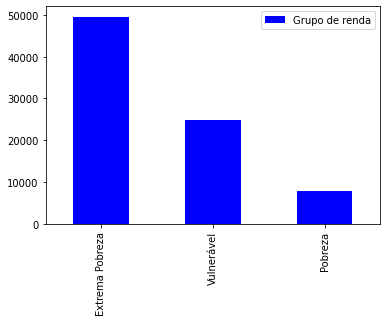

In [19]:
# Grupo de renda
# Extrema Pobreza	- 49562
# Vulnerável	- 24747
# Pobreza	- 7966

tipo_grupo_renda = df_familia['Grupo de renda'].value_counts().to_frame()
tipo_grupo_renda.plot(kind='bar',color='blue')

###Realizando uma análise grosseira da porcentagem de dados, temos:
- **60%** na classe **Extrema Pobreza**;
- **30%** na classe **Vulnerável**;
- **10%** na classe **Pobreza**;



##**Grupo de Renda da família**


In [20]:
#Retiramos o dado "Vulnerável" pois eles não se encaixam no grupo para inclusão no bolsa família devivo a sua renda média ser acima de 200,01
grupoRenda = df_familia[df_familia['Grupo de renda'] == 'Vulnerável'].index
df_familia.drop(grupoRenda, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


- Para fazer parte do programa bolsa família a família precisa estar no grupo de **Extrema pobreza** e **Pobreza**, devido a essas conclusões retiramos o grupo **Vulnerável** da base de dados para trabalhar com os dados das pessoas que irão fazer parte do programa.

In [21]:
df_familia

,Grupo de renda,Local de Domicílio,Espécie do domicílio,qtde_pessoas
0,Extrema Pobreza,Urbana,Particular Permanente,4
1,Pobreza,Rural,Particular Permanente,5
2,Pobreza,Urbana,Particular Permanente,2
4,Extrema Pobreza,Rural,Particular Permanente,2
5,Extrema Pobreza,Urbana,Particular Permanente,2
...,...,...,...,...
82267,Pobreza,Urbana,Particular Permanente,3
82268,Extrema Pobreza,Urbana,Particular Permanente,3
82270,Pobreza,Urbana,Particular Permanente,3
82271,Extrema Pobreza,Urbana,Particular Permanente,3


- Depois da retirada do grupo **Vunerável**, refizemos a análise da quantidade de dados e diminuimos o volume em **30%**.

##**Quantidade de pessoas da família**


In [22]:
df_familia[["qtde_pessoas"]].describe()

,qtde_pessoas
count,57528.000000
mean,2.721040
std,1.464688
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,14.000000


Quantidade mínima de pessoas: qtde_pessoas    1
dtype: int64
Quantidade máxima de pessoas: qtde_pessoas    14
dtype: int64
Média de pessoas por família: 2.7210401891252953


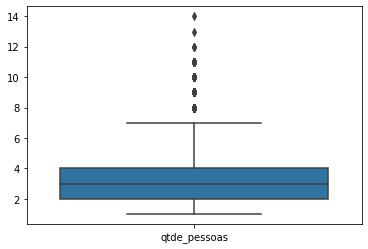

In [68]:
#Verificando o intervalo da quantidade de pessoas por família e média de pessoas
data_qtdPessoas = df_familia[["qtde_pessoas"]]
media_qtdPessoas = df_familia['qtde_pessoas'].mean()
print(f"Quantidade mínima de pessoas: {data_qtdPessoas.min()}")
print(f"Quantidade máxima de pessoas: {data_qtdPessoas.max()}")
print(f'Média de pessoas por família: {media_qtdPessoas}')

#Verificando quantidade de membros na família
dados_qtdPessoas = df_familia[["qtde_pessoas"]]
sns.boxplot(data=dados_qtdPessoas)


Realizando uma análise de dados pela quantidade de pessoas numa família temos: 1 pessoa como valor mínimo, 14 como valor máximo e em média 2.72 pessoas. Com base no diagrama de boxplot podemos perceber que a maior quantidade de pessoas está entre 2 e 4 pessoas por família, já verificando os outliers(que seriam os valores 'extremos' onde não possuem com frenquência) vemos quede 8 à 14 pessoas são os valores mais 'extremos' da base.

---

#Análise de dados de Pessoas

In [24]:
# Carrega a base de dados de pessoas
data_pessoa = pd.read_csv("/content/drive/MyDrive/Dataset_CadastroUnico_Sergipe/data_pessoas_sergipe.csv")


In [69]:
#Criando uma tabela com os dados que vamos utilizar
df_pessoa = data_pessoa.iloc[:,[5,6,7,8,12]]

df_pessoa

,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_sabe_ler_escrever_memb
0,1,19,1,4.0,1.0
1,1,17,3,4.0,1.0
2,1,4,3,4.0,2.0
3,2,4,3,4.0,2.0
4,1,7,3,2.0,1.0
...,...,...,...,...,...
205609,1,33,2,4.0,1.0
205610,1,5,3,4.0,2.0
205611,1,18,3,4.0,1.0
205612,1,56,2,4.0,1.0


In [66]:
#transformação de dados para qualitativo

###obs: rodar uma vez, depois da primeira vez vai dar erro

#transformação de dados de cor ou raça
df_pessoa['cod_raca_cor_pessoa'] = pd.cut(df_pessoa['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,5.0,float('inf')],right=False,labels=['Branca','Preta','Amarela','Parda','Indígena'])
df_pessoa.rename(columns = {'cod_raca_cor_pessoa' : 'Cor ou raça'}, inplace = True)

#transformação de dados de sexo
df_pessoa['cod_sexo_pessoa'] = pd.cut(df_pessoa['cod_sexo_pessoa'],bins=[1.0,2.0,float('inf')],right=False,labels=['Masculino','Feminino'])
df_pessoa.rename(columns = {'cod_sexo_pessoa' : 'Sexo'}, inplace = True)

#transformação de dados de relaçao de parentesco com o RF
df_pessoa['cod_parentesco_rf_pessoa'] = pd.cut(df_pessoa['cod_parentesco_rf_pessoa'],bins=[1,2,3,4,5,6,7,8,9,10,11,float('inf')],right=False,labels=['Pessoa Responsável pela Unidade Familiar - RF','Cônjuge ou companheiro(a)','Filho(a)','Enteado(a)','Neto(a) ou bisneto(a)','Pai ou mãe','Sogro(a)','Irmão ou irmã', 'Genro ou nora','Outro parente', 'Não parente'])
df_pessoa.rename(columns = {'cod_parentesco_rf_pessoa' : 'Relaçao de parentesco com o RF'}, inplace = True)

#transformação de dados de analfabeto
df_pessoa['cod_sabe_ler_escrever_memb'] = pd.cut(df_pessoa['cod_sabe_ler_escrever_memb'],bins=[1.0,2.0,float('inf')],right=False,labels=['Sim','Não'])
df_pessoa.rename(columns = {'cod_sabe_ler_escrever_memb' : 'Analfabeto?'}, inplace = True)

df_pessoa


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,Sexo,idade,Relaçao de parentesco com o RF,Cor ou raça,Analfabeto?
0,Masculino,19,Pessoa Responsável pela Unidade Familiar - RF,Parda,Sim
1,Masculino,17,Filho(a),Parda,Sim
2,Masculino,4,Filho(a),Parda,Não
3,Feminino,4,Filho(a),Parda,Não
4,Masculino,7,Filho(a),Preta,Sim
...,...,...,...,...,...
205609,Masculino,33,Cônjuge ou companheiro(a),Parda,Sim
205610,Masculino,5,Filho(a),Parda,Não
205611,Masculino,18,Filho(a),Parda,Sim
205612,Masculino,56,Cônjuge ou companheiro(a),Parda,Sim


**Transformação dos dados para qualitativo**
- Fizemos as transformações com base no diciónario de dados que nos foi disponibilizado:
 - Para **Cor ou raça** temos: 
   - **1.0 - Branca**;
   - **2.0 - Preta**;
   - **3.0 - Amarela**;
   - **4.0 - Parda**;
   - **5.0 - Indígena**;

 - Para **Sexo** temos: 
   - **1.0 - Masculino**;
   - **2.0 - Feminino**;

 - Para **Cor ou raça** temos: 
   - **1 - Pessoa Responsável pela Unidade Familiar - RF**;
   - **2 - Cônjuge ou companheiro(a)**;
   - **3 - Filho(a)'**;
   - **4 - Enteado(a)**;
   - **5 - Neto(a) ou bisneto(a)**;
   - **6 - Pai ou mãe**;
   - **7 - Sogro(a)**;  
   - **8 - Irmão ou irmã**;  
   - **9 - Genro ou nora**;  
   - **10 - Outro parente**;  
   - **11 - Não parente**;  

 - Para **Analfabeto?** temos: 
   - **1.0 - Sim**;
   - **2.0 - Não**;

 

##**Analisando cor e raça em pessoas**


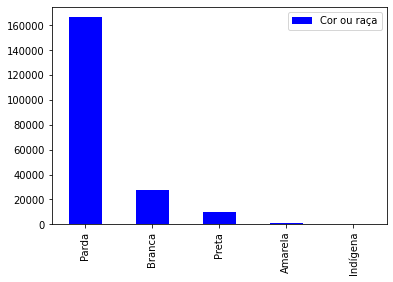

In [ ]:
#Parda > Banca > Preta > Amarela > Indígina 
#Cor ou raça
#Parda - 166620
#Branca -	27640
#Preta - 9997
#Amarela -1027
#Indígena - 274

cor_da_raca = df_pessoa['Cor ou raça'].value_counts().to_frame()
cor_da_raca.plot(kind='bar',color='blue')

- Podemos ver que a maior concentração de dados está na presente no grupo "Parda".
- analisando o gráfico barras podemos ver que o grupo 'Parda' possui mais da metade da base de dados chegando a **81%** .

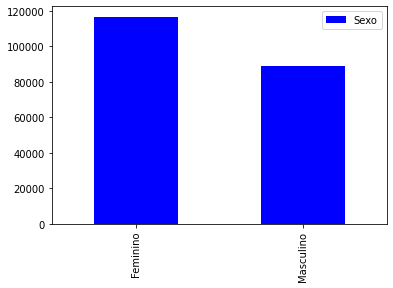

In [58]:
#Mulher > Homem
#Sexo
#Feminino -	116695
#Masculino -	88919

tipo_do_sexo = df_pessoa['Sexo'].value_counts().to_frame()

tipo_do_sexo.plot(kind='bar',color='blue')

- Analisando o gráfico de barras e também com o valor total de dados, de uma forma grosseira podemos ver que a bae possui **57%** de dados do sexo feminino e **43%** dos dados do sexo masculino. 
- Podemos dizer que a quantidade de cadastro feito pelo sexo feminino podem ser de mulheres gestantes, amamentadoras entre outros grupos femininos. 

##**Analisando a quantidade de analfabetos em pessoas**


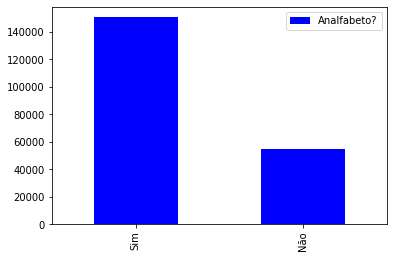

In [ ]:
#Sim > Não
#Analfabeto?
#Sim -	150732
#Não -	54861

e_analfabeto = df_pessoa['Analfabeto?'].value_counts().to_frame()

e_analfabeto.plot(kind='bar',color='blue')

- Analisando os dados para idenficar a quantidade de analfabetos da base, temos: **74%** analfabetos e **26%** não analfabetos
- Esses dados podem devirar de acordo com a história devido a maioria estudar em escolas publicas fazendo com que algumas pessoas comecem a largar a escola cedo para começarem a trabalhar, isso faz com o que número de analfabetos cresça.

##**Analisando a relação dos parentescos em pessoas**


| Relaçao de parentesco com o RF | Quantidade |
|---|---|
Filho(a) |	91214
Pessoa Responsável pela Unidade Familia RF |	82275
Cônjuge ou companheiro(a)	| 22975
Neto(a) ou bisneto(a)	| 4139
Irmão ou irmã	| 1633
Outro parente	|1435
Pai ou mãe	| 1224
Enteado(a)	| 372
Não parente	| 170
Genro ou nora	| 133
Sogro(a)	| 44

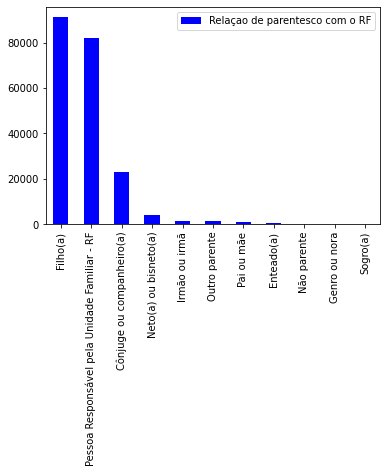

In [ ]:
#Relaçao de parentesco com o RF

relacao_parentesco = df_pessoa['Relaçao de parentesco com o RF'].value_counts().to_frame()

#relacao_parentesco

relacao_parentesco.plot(kind='bar',color='blue')

Realizando uma análise dos dados do parentesco podemos concluir que boa parte derivam de filhos e de uma pessoa reponsável pela unidade familiar. Isso acontece devido a quantidade de pessoas que são reponsáveis por algúem quererem realizar o cadastro no bolsa família devido a baixa renda.

##**Idade de pessoas das pessoas**


In [28]:
df_pessoa['idade'].describe()

count     205614
unique         4
top       adulto
freq      104966
Name: idade, dtype: object

Quantidade mínima: idade    0
dtype: int64
Quantidade máxima : idade    112
dtype: int64
Média: 25.832720534593946


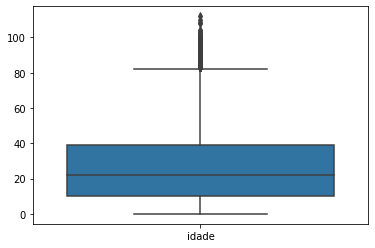

In [61]:
#Verificando o intervalo da idade e média de idade das pessoas
data_idadePessoa = df_pessoa[["idade"]]
media_idadePessoa = df_pessoa['idade'].mean()
print(f"Quantidade mínima: {data_idadePessoa.min()}")
print(f"Quantidade máxima : {data_idadePessoa.max()}")
print(f'Média: {media_idadePessoa}')

#Gerando gráfico da idade
dados_idadePessoa = df_pessoa[["idade"]]
sns.boxplot(data=dados_idadePessoa)

- Com esses dados podemos analisar que existem cadastros com recém nascidos na base(com 0 de idade) como valor mínimo, também possui pessoas acima de 112 anos de idade como valor máximo. Possui uma média de 2,72 anos de idade na base
- Analisando o boxplot podemos ver que a maior concentração de idade está entre  15 e 40 anos de idade. Posssuindo também alguns outliers que variam de 80 até maiores que 100 anos de idade.

In [62]:
#transformação de dados da idade
df_pessoa['idade'] = pd.cut(df_pessoa['idade'],bins=[0,13,19,60,float("inf")],right=False,labels=['criança','adolescente','adulto','idoso'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Para uma segunda análise transformamos os dados para qualitativos, assim:
- **[0,13] - criança**;
- **[13,19] - adolescente**;
- **[19,60] - adulto**;
- **[60,infitinho] - idoso**;

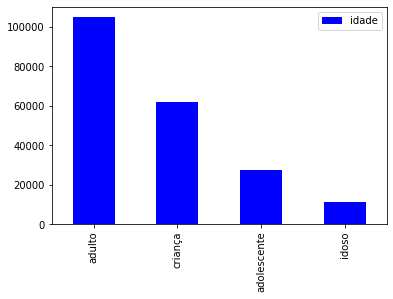

In [64]:
# idade
# adulto - 104966
# criança	- 61954
# adolescente	- 27610
# idoso	- 11084


idade_pessoa = df_pessoa['idade'].value_counts().to_frame()

idade_pessoa.plot(kind='bar',color='blue')

- Com essa organização de dados podemos ver que as maiores concentrações de pessoas estão presentes nas faixas etárias **adulta** e **criança**. 
- Fazendo uma análise por porcentagem temos: **51%** adulto, **30%** criança, **13%** adolescente e **6%** idoso.